# Cosinus Ähnlichkeit, Markdown

* J.Busse, www.jbusse.de, 2021-04-12, 2022-04-19, spaCy: 2022-06-09

Lizenz: public domain / [CC 0](https://creativecommons.org/publicdomain/zero/1.0/deed.de) 

Dieses Notebook: Erstes Eingangs-Beispiel für die LV dsci-txt SS 2021 HAW LA ... ein minimales Mini-Programm, das die Cosinus-Ähnlichkeit zwischen (Markdown-) Texten als seaborn-Clustermap visualisiert.

Beabsichtigte Verwendung:
* Studierende haben einen lauffähigen Ausgangspunkt,
* den sie hier und da spielerisch verändern können.

VEREINBARUNG: Wenn Code-Snippets im Netz recherchiert und nur unwesentlich verändert wurden, dann wird die Quelle in der ersten Zeile einer Zelle mit URL referenziert (siehe z.B. unten `glob`). Es liegt damit auch kein Plagiat mehr vor. Umgekehrt gilt: Eine Zelle, die keine Quellenangabe enhält, gilt als "aus dem Kopf" selbst geschrieben.

Dateien:
* {download}`regex_XX.zip`
* auspacken; das Verzeichnis `regex_XX/` sollte idealerweise als Geschwister-Verzeichnis des aktuellen Arbeitsverzeichnis `md/` angelegt werden.

In [1]:
import numpy as np
import pandas as pd

### Global Parameters

In [2]:
# path to files, incl. glob mask
#path_to_ipynb = "md/*.md"
path_to_ipynb = "../regex_XX/*.md"

In [3]:
# show intermediary results
# 0 none, 1 informative, 2 debug
verbosity = 1

def verbose(level,item):
    if level <= verbosity:
        display(item)

Read Files 
----

In [4]:
# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
import glob
files = glob.glob(path_to_ipynb)
verbose(1,len(files))
verbose(2,files)

15

In [5]:
files

['../regex_XX/regex_8.md',
 '../regex_XX/regex_6.md',
 '../regex_XX/regex_5.md',
 '../regex_XX/regex_12.md',
 '../regex_XX/regex_wiki_2.md',
 '../regex_XX/regex_9.md',
 '../regex_XX/regex_2.md',
 '../regex_XX/regex_15.md',
 '../regex_XX/regex_4.md',
 '../regex_XX/regex_wiki_1.md',
 '../regex_XX/regex_14.md',
 '../regex_XX/regex_10.md',
 '../regex_XX/regex_7.md',
 '../regex_XX/regex_1.md',
 '../regex_XX/regex_13.md']

In [6]:
type(files[0])

str

In [7]:
corpus_dict = {}

for file in files:
    with open(file, 'r') as f:
        corpus_dict[file] = f.read()
corpus_dict

{'../regex_XX/regex_8.md': 'Reguläre Ausdrücke finden in der Informatik sehr häufige Anwendung.\nSie sind vor allem bei der Suche von großer Bedeutung.\nBeispielsweise kann durch Angeben des Suchkriteriums ".*" jede beliebige Zeichenfolge gefunden werden.\nDabei steht der Punkt für EIN beliebiges Zeichen und der Stern dahinter für eine beliebige Anzahl dieses vorangegangenen Zeichens.',
 '../regex_XX/regex_6.md': 'Kann beim Programmieren für diverse Problemlösungen verwendet werden um in Strings etwas zu \nsuchen oder darin etwas zu prüfen bzw. zu bearbeiten. \nReguläre Ausdrücke werden auch als RegEx abgekürzt.',
 '../regex_XX/regex_5.md': '\nRegex wird benutzt um Texte nach bestimmten Mustern zu durchsuchen.\nDafür wird eine Zeichenkette aus verschiedenen Symbolen verwendet welche das zu suchende Muster beschreiben.\nReguläre Ausdrücke gehören zu den formalen Sprachen.\nDie Symbole sind teil der Sprachgrammatik.\nAußerdem kann man aus Regex einen endlichen Automat bilden und umgekehr

In [8]:
corpus = list(corpus_dict.values())
corpus

['Reguläre Ausdrücke finden in der Informatik sehr häufige Anwendung.\nSie sind vor allem bei der Suche von großer Bedeutung.\nBeispielsweise kann durch Angeben des Suchkriteriums ".*" jede beliebige Zeichenfolge gefunden werden.\nDabei steht der Punkt für EIN beliebiges Zeichen und der Stern dahinter für eine beliebige Anzahl dieses vorangegangenen Zeichens.',
 'Kann beim Programmieren für diverse Problemlösungen verwendet werden um in Strings etwas zu \nsuchen oder darin etwas zu prüfen bzw. zu bearbeiten. \nReguläre Ausdrücke werden auch als RegEx abgekürzt.',
 '\nRegex wird benutzt um Texte nach bestimmten Mustern zu durchsuchen.\nDafür wird eine Zeichenkette aus verschiedenen Symbolen verwendet welche das zu suchende Muster beschreiben.\nReguläre Ausdrücke gehören zu den formalen Sprachen.\nDie Symbole sind teil der Sprachgrammatik.\nAußerdem kann man aus Regex einen endlichen Automat bilden und umgekehrt.',
 'Reguläre Ausdrücke sind ein Tool, um Teile eines Texts zu extrahieren o

## spaCy

(2022-06-09)

Intro in spaCy: <https://spacy.io/usage/spacy-101>

In [9]:
import spacy

nlp = spacy.load("de_core_news_sm")

In [10]:
nlp(corpus[2])


Regex wird benutzt um Texte nach bestimmten Mustern zu durchsuchen.
Dafür wird eine Zeichenkette aus verschiedenen Symbolen verwendet welche das zu suchende Muster beschreiben.
Reguläre Ausdrücke gehören zu den formalen Sprachen.
Die Symbole sind teil der Sprachgrammatik.
Außerdem kann man aus Regex einen endlichen Automat bilden und umgekehrt.

In [11]:
def lemma_string(text, postags = None):
    """returns lemmata of a string, joined again to a string"""
    txt = nlp(text)
    txt_lemmata = [ t.lemma_ for t in txt if (not postags or t.pos_ in postags) ]
    return " ".join(txt_lemmata)
    

In [12]:
postags = ['NOUN', 'VERB', 'ADJ']
lemma_string(corpus[2], postags)

'benutzen Text bestimmt Muster durchsuchen Zeichenkette verschieden Symbole verwenden welcher suchend Muster beschreiben regulär Ausdruck gehören formal Sprache Symbol Sprachgrammatik endlich Automat bilden'

In [13]:
corpus_lemmatized = [ lemma_string(c, postags) for c in corpus ]
corpus_lemmatized[2]

'benutzen Text bestimmt Muster durchsuchen Zeichenkette verschieden Symbole verwenden welcher suchend Muster beschreiben regulär Ausdruck gehören formal Sprache Symbol Sprachgrammatik endlich Automat bilden'

Bag of Words: CountVectorizer
------

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()

#bag_of_words = count.fit_transform(np.array(corpus))
bag_of_words = count.fit_transform(np.array(corpus_lemmatized))
verbose(2,type(bag_of_words))

In [15]:
bag_of_words

<15x149 sparse matrix of type '<class 'numpy.int64'>'
	with 281 stored elements in Compressed Sparse Row format>

In [16]:
feature_names = count.get_feature_names()
len(feature_names)

/home/dsci/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


149

In [17]:
pd.DataFrame(bag_of_words.toarray(), columns=feature_names).T

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
abgeglichen     0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
abkürzen        0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
abkürzung       0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
angeben         1   0   0   0   0   0   0   0   0   0   0   0   1   0   0
anwendung       1   0   0   0   0   0   0   0   0   0   0   0   1   0   0
...            ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
zeichenfolgen   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
zeichenkett     0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
zeichenkette    0   0   1   0   0   0   0   0   0   1   0   1   0   0   0
äquivalent      0   0   0   0   0   0   0   0   1   0   1   0   0   0   0
überprüfen      0   0   0   1   0   0   0   0   0   0   0   0   0   1   1

[149 rows x 15 columns]

## TfIdf


https://chrisalbon.com/machine_learning/preprocessing_text/tf-idf/


https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Equivalent to CountVectorizer followed by TfidfTransformer: 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer



  * https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer
  * https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
verbose(1,transformer)

TfidfTransformer(smooth_idf=False)

In [19]:
tfidf = transformer.fit_transform(bag_of_words)
verbose(1,pd.DataFrame(tfidf.toarray()))

0         1         2         3         4         5         6    \
0   0.00000  0.000000  0.000000  0.204621  0.204621  0.000000  0.000000   
1   0.00000  0.377075  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.24362  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.235875   
8   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.00000  0.000000  0.195483  0.000000  0.000000  0.195483  0.000000   
10  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.00000  0.000000  0.000000  0.204621  0.204621  0.000000  0.000000   
13  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         7         8         9    ...       139       140      141       142  \
0   0.177102  0.083015  0.000000  ...  0.000000  0.000000  0.00000  0.260117   
1   0.000000  0.124383  0.000000  ...  0.000000  0.000000  0.00000  0.000000   
2   0.000000  0.091374  0.000000  ...  0.000000  0.000000  0.00000  0.000000   
3   0.000000  0.173448  0.000000  ...  0.000000  0.000000  0.00000  0.135870   
4   0.171441  0.160722  0.000000  ...  0.000000  0.171441  0.24362  0.000000   
5   0.000000  0.270586  0.000000  ...  0.000000  0.000000  0.00000  0.141308   
6   0.000000  0.267777  0.000000  ...  0.000000  0.000000  0.00000  0.279682   
7   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.00000  0.000000   
8   0.000000  0.164995  0.000000  ...  0.000000  0.351998  0.00000  0.000000   
9   0.000000  0.193447  0.158941  ...  0.195483  0.000000  0.00000  0.000000   
10  0.000000  0.164995  0.000000  ...  0.000000  0.351998  0.00000  0.000000   
11  0.000000  0.000000  0.235470  ...  0.000000  0.000000  0.00000  0.000000   
12  0.177102  0.083015  0.000000  ...  0.000000  0.000000  0.00000  0.260117   
13  0.000000  0.239961  0.000000  ...  0.000000  0.000000  0.00000  0.125315   
14  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.00000  0.000000   

         143       144       145       146       147       148  
0   0.177102  0.000000  0.000000  0.000000  0.000000  0.000000  
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2   0.000000  0.000000  0.000000  0.194937  0.000000  0.000000  
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.185016  
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5   0.192421  0.000000  0.000000  0.000000  0.000000  0.000000  
6   0.000000  0.270595  0.000000  0.000000  0.000000  0.000000  
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
8   0.000000  0.000000  0.000000  0.000000  0.203346  0.000000  
9   0.000000  0.000000  0.195483  0.137566  0.000000  0.000000  
10  0.000000  0.000000  0.000000  0.000000  0.203346  0.000000  
11  0.000000  0.000000  0.000000  0.203802  0.000000  0.000000  
12  0.177102  0.000000  0.000000  0.000000  0.000000  0.000000  
13  0.000000  0.000000  0.000000  0.000000  0.000000  0.170643  
14  0.000000  0.000000  0.000000  0.000000  0.000000  0.268513  

[15 rows x 149 columns]

Cosine Similarity
-------

  * interessant, ggf. auch noch ausprobieren?:  https://stackoverflow.com/questions/17627219/whats-the-fastest-way-in-python-to-calculate-cosine-similarity-given-sparse-mat
  
Wir machen es hier eher low level, um unter die Motorhaube sehen zu können:
  * https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
  * didaktische Erklärung: http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(tfidf)
#verbose(2,similarity)

In [21]:
similarity_df = pd.DataFrame(similarity)
similarity_df.columns = files 
similarity_df.index = files
similarity_df

../regex_XX/regex_8.md  ../regex_XX/regex_6.md  \
../regex_XX/regex_8.md                     1.000000                0.020651   
../regex_XX/regex_6.md                     0.020651                1.000000   
../regex_XX/regex_5.md                     0.015171                0.050627   
../regex_XX/regex_12.md                    0.064139                0.043148   
../regex_XX/regex_wiki_2.md                0.057047                0.064516   
../regex_XX/regex_9.md                     0.171460                0.101615   
../regex_XX/regex_2.md                     0.247189                0.111663   
../regex_XX/regex_15.md                    0.000000                0.102845   
../regex_XX/regex_4.md                     0.041091                0.061568   
../regex_XX/regex_wiki_1.md                0.117714                0.056143   
../regex_XX/regex_14.md                    0.041091                0.061568   
../regex_XX/regex_10.md                    0.007930                0.041048   
../regex_XX/regex_7.md                     0.936665                0.020651   
../regex_XX/regex_1.md                     0.059157                0.130359   
../regex_XX/regex_13.md                    0.000000                0.056407   

                             ../regex_XX/regex_5.md  ../regex_XX/regex_12.md  \
../regex_XX/regex_8.md                     0.015171                 0.064139   
../regex_XX/regex_6.md                     0.050627                 0.043148   
../regex_XX/regex_5.md                     1.000000                 0.087919   
../regex_XX/regex_12.md                    0.087919                 1.000000   
../regex_XX/regex_wiki_2.md                0.129476                 0.084683   
../regex_XX/regex_9.md                     0.062059                 0.146126   
../regex_XX/regex_2.md                     0.123619                 0.164193   
../regex_XX/regex_15.md                    0.032358                 0.000000   
../regex_XX/regex_4.md                     0.235355                 0.085854   
../regex_XX/regex_wiki_1.md                0.085406                 0.094753   
../regex_XX/regex_14.md                    0.235355                 0.085854   
../regex_XX/regex_10.md                    0.774468                 0.160074   
../regex_XX/regex_7.md                     0.015171                 0.064139   
../regex_XX/regex_1.md                     0.044405                 0.470051   
../regex_XX/regex_13.md                    0.033856                 0.081812   

                             ../regex_XX/regex_wiki_2.md  \
../regex_XX/regex_8.md                          0.057047   
../regex_XX/regex_6.md                          0.064516   
../regex_XX/regex_5.md                          0.129476   
../regex_XX/regex_12.md                         0.084683   
../regex_XX/regex_wiki_2.md                     1.000000   
../regex_XX/regex_9.md                          0.076323   
../regex_XX/regex_2.md                          0.104764   
../regex_XX/regex_15.md                         0.000000   
../regex_XX/regex_4.md                          0.139901   
../regex_XX/regex_wiki_1.md                     0.072546   
../regex_XX/regex_14.md                         0.139901   
../regex_XX/regex_10.md                         0.101004   
../regex_XX/regex_7.md                          0.057047   
../regex_XX/regex_1.md                          0.064764   
../regex_XX/regex_13.md                         0.000000   

                             ../regex_XX/regex_9.md  ../regex_XX/regex_2.md  \
../regex_XX/regex_8.md                     0.171460                0.247189   
../regex_XX/regex_6.md                     0.101615                0.111663   
../regex_XX/regex_5.md                     0.062059                0.123619   
../regex_XX/regex_12.md                    0.146126                0.164193   
../regex_XX/regex_wiki_2.md                0.076323                0.104764   
../regex_XX/regex_9.md                     1.000

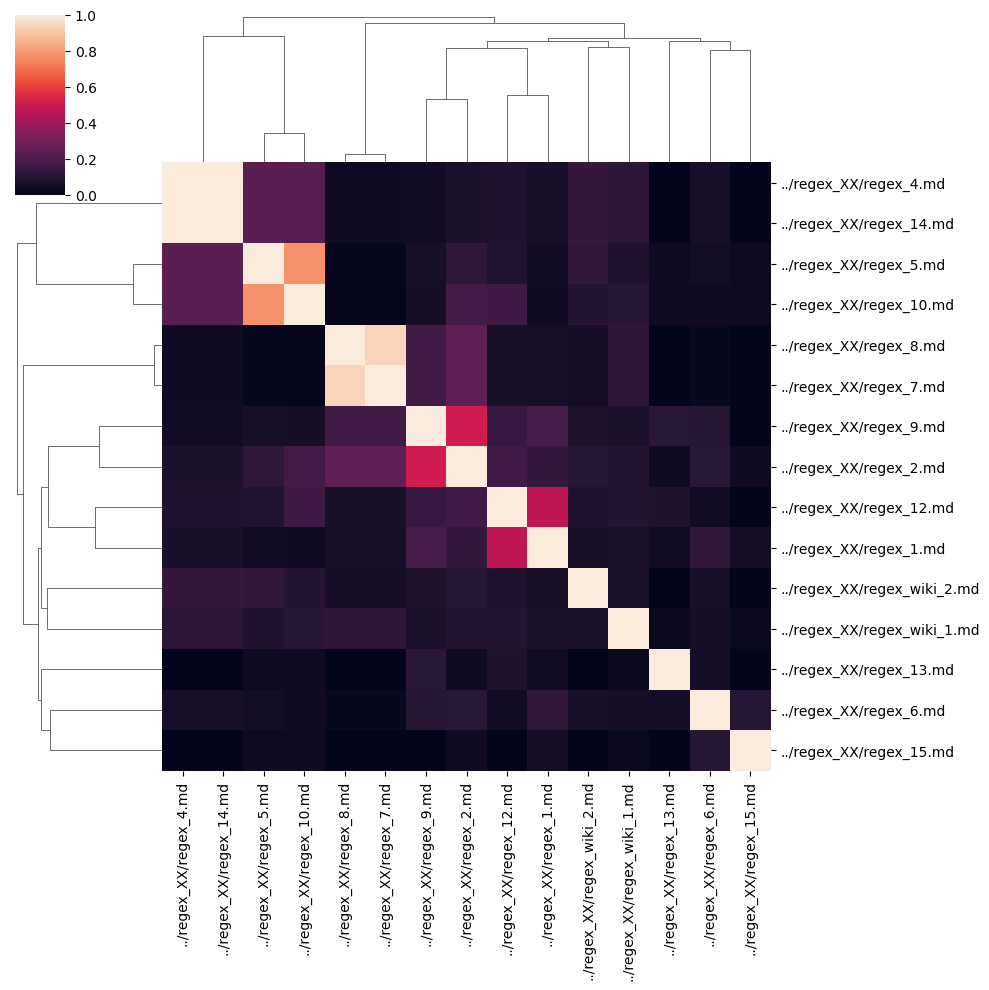

In [22]:
import seaborn as sns
mask = np.zeros_like(similarity)
mask[np.triu_indices_from(mask)] = True
#ax = sns.heatmap(similarity_df)
ax = sns.clustermap(similarity_df)
ax.savefig("clustermap.png")

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [23]:
corpus_dict['regex_XX/regex_8.md']

KeyError: 'regex_XX/regex_8.md'

In [ ]:
corpus_dict['regex_XX/regex_7.md']

In [ ]:
corpus_dict['regex_XX/regex_wiki_1.md']